# Logistic Regression to Classify Subreddit Posts

In [178]:
pip install squarify (algorithm for treemap)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `/opt/anaconda3/bin/python -m pip install squarify (algorithm for treemap)'
Note: you may need to restart the kernel to use updated packages.


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify    


import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV  

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

In [180]:
df = pd.read_csv('./prepared_data.csv')

In [181]:
df.head()

,num_comments,num_upvotes,subreddit,comment_length,question_length,AUX_comment,NUM_comment,ADV_comment,SCONJ_comment,VERB_comment,...,way,word,work,world,year,Topic0,Topic1,Topic2,Topic3,Topic4
0,3,3,1,184,1970,0.055556,0.055556,0.083333,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.054868,0.055424,0.470683,0.054959,0.364559,0.054375
1,14,3,0,543,160,0.052632,0.026316,0.078947,0.017544,0.114035,...,0.0,0.0,0.0,0.0,0.000000,0.258384,0.045055,0.044136,0.044552,0.607874
2,55,3,0,83,343,0.047619,0.000000,0.142857,0.000000,0.095238,...,0.0,0.0,0.0,0.0,0.000000,0.061852,0.060755,0.060420,0.060941,0.756032
3,3,0,1,921,185,0.037037,0.010582,0.084656,0.015873,0.121693,...,0.0,0.0,0.0,0.0,0.000000,0.740360,0.110179,0.052919,0.048468,0.048074
4,29,1,0,74,115,0.125000,0.000000,0.125000,0.000000,0.312500,...,0.0,0.0,0.0,0.0,0.000000,0.085808,0.083881,0.083705,0.084047,0.662560


In [182]:
features = [c for c in df._get_numeric_data().columns if c != 'subreddit']

X = df[features] 

y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    random_state = 42)

In [183]:
X.columns

Index(['num_comments', 'num_upvotes', 'comment_length', 'question_length',
       'AUX_comment', 'NUM_comment', 'ADV_comment', 'SCONJ_comment',
       'VERB_comment', 'ADJ_comment',
       ...
       'way', 'word', 'work', 'world', 'year', 'Topic0', 'Topic1', 'Topic2',
       'Topic3', 'Topic4'],
      dtype='object', length=135)

In [184]:
y.shape

(2664,)

In [185]:
X.head()

,num_comments,num_upvotes,comment_length,question_length,AUX_comment,NUM_comment,ADV_comment,SCONJ_comment,VERB_comment,ADJ_comment,...,way,word,work,world,year,Topic0,Topic1,Topic2,Topic3,Topic4
0,3,3,184,1970,0.055556,0.055556,0.083333,0.000000,0.111111,0.083333,...,0.0,0.0,0.0,0.0,0.054868,0.055424,0.470683,0.054959,0.364559,0.054375
1,14,3,543,160,0.052632,0.026316,0.078947,0.017544,0.114035,0.122807,...,0.0,0.0,0.0,0.0,0.000000,0.258384,0.045055,0.044136,0.044552,0.607874
2,55,3,83,343,0.047619,0.000000,0.142857,0.000000,0.095238,0.047619,...,0.0,0.0,0.0,0.0,0.000000,0.061852,0.060755,0.060420,0.060941,0.756032
3,3,0,921,185,0.037037,0.010582,0.084656,0.015873,0.121693,0.095238,...,0.0,0.0,0.0,0.0,0.000000,0.740360,0.110179,0.052919,0.048468,0.048074
4,29,1,74,115,0.125000,0.000000,0.125000,0.000000,0.312500,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.085808,0.083881,0.083705,0.084047,0.662560


In [186]:
#grid searching logreg model
params = {
    'penalty': ['l1', 'l2'],
    'C': [1, .1],
    'solver': ['liblinear']
}



gs = GridSearchCV(LogisticRegression(), param_grid = params)
gs.fit(X_train, y_train)

print('Cross Val Score:', gs.best_score_)
print('Best Params:', gs.best_params_)

Cross Val Score: 0.6866904761904763
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [187]:
print(gs.score(X_test, y_test))
print(gs.score(X_train, y_train))

0.6711711711711712
0.7397397397397397


In [188]:
#looking at the grid search results
pd.DataFrame(gs.cv_results_)[['mean_test_score', 'std_test_score']].sort_values('std_test_score')

,mean_test_score,std_test_score
0,0.684187,0.016266
3,0.667669,0.017745
2,0.638644,0.018840
1,0.686690,0.025332


In [189]:
# making the model with the best parameters

model = LogisticRegression(n_jobs = -1, C= 1, penalty= 'l1', solver= 'liblinear')

model.fit(X_train, y_train)
preds = model.predict(X_test)

residuals = y_test - preds

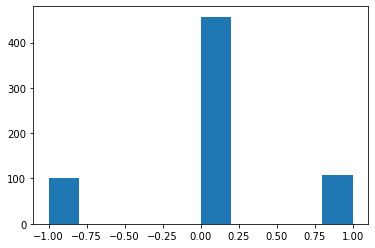

In [190]:
plt.hist(residuals);

In [191]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  preds).ravel()

print(confusion_matrix(y_test,
                       preds))

[[236 102]
 [107 221]]


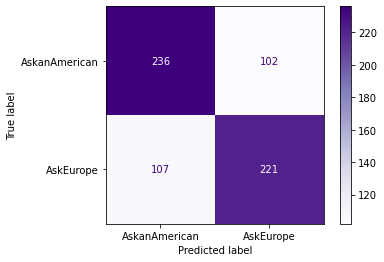

In [192]:
#looking at the confusion matrix
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Purples', 
                      values_format='d', display_labels=['AskanAmerican', 'AskEurope']);

In [193]:
# model scores

print('Precision:', tp/(tp+fp))
print('Recall:', tp/(tp + fn))
print('Accuracy:',(tn + tp) / (tn + tp + fn + fp))
print('Specificity:',tn / (tn + fp))

Precision: 0.6842105263157895
Recall: 0.6737804878048781
Accuracy: 0.6861861861861862
Specificity: 0.6982248520710059


**Interpretation**

The model's overall performance can predict accurately 67\% of the subreddit posts. 

The model performs better on predicting 'AskEurope' posts. This could be due to leakage in foreign langauges included in the data, or due to the fact that AskEurope has more specific topics asked about. 

In [194]:
#getting coefficients of best model 
coefs = model.coef_
coefs[0].shape

(135,)

In [195]:
#df of best model 

coef_df = pd.DataFrame({'feature': X.columns,
              'coef': coefs[0]})

#top 10 biggest indicators 
coef_df.sort_values('coef').sort_values('coef', ascending=False)

,feature,coef
74,language,3.363934
92,old,2.237866
41,child,2.014032
21,ADP_comment,1.984534
103,quite,1.809765
...,...,...
48,edit,-1.953696
114,term,-1.979684
62,guy,-2.754542
113,state,-4.484530


**Interpretation**

The model’s predictions used mostly words to determine which subreddit a submission belonged to, for example, a subreddit that includes the word ‘amendment’ is 60%
% more likely to be from ‘AskAnAmerican’ whereas a model with the word ‘language’ is 30% more likely to be from ‘AskEurope.’

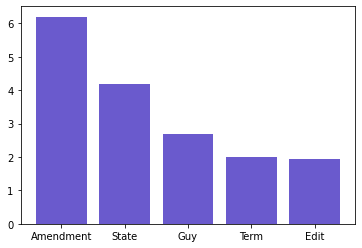

In [198]:
# Comparing visualizations
height = [6.2, 4.2, 2.7, 1.99, 1.95]
bars = ("Amendment", "State", "Guy", "Term", 'Edit')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'slateblue')

# Create names on the x-axis
plt.xticks(y_pos, bars, fontsize=10)

# Show graphic
plt.show()

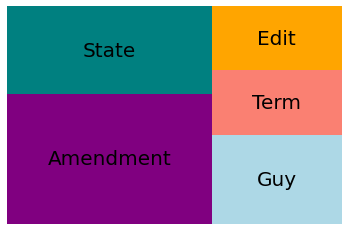

In [199]:
# top 5 indicator words used by Americans 

df = pd.DataFrame({'Ask an American':[6.2, 4.2, 2.7, 1.99, 1.95],\
                   'group':["Amendment", "State", "Guy", "Term", 'Edit'] })


squarify.plot(sizes=df['Ask an American'], label=df['group'], alpha = 1,\
             color=["purple","teal","lightblue", "salmon", 'orange'],\
             bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':20})
plt.axis('off')
plt.show()

<Figure size 1440x720 with 0 Axes>

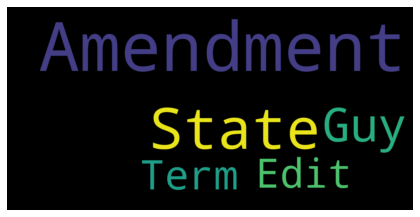

In [200]:
# top 5 indicator words used by Americans 

d = dict(zip(df['group'], df['Ask an American']))



wordcloud = WordCloud(width = 1600, height = 800,
                     )
plt.figure( figsize=(20,10), facecolor='k')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") 
plt.tight_layout(pad=0)
plt.axis("off")
plt.show();

[source](https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python)

<Figure size 1440x720 with 0 Axes>

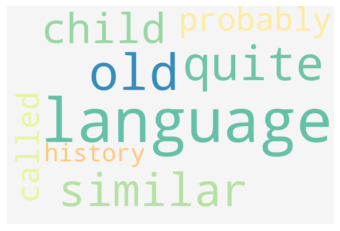

In [201]:
# top indicator words used by Europeans 


d= {'language':3.377450,
'old':2.149021,
'quite':1.937635,
'similar':1.776862,
'child':1.456640,
   'probably': 1.35, 
   'called': 1.288, 
   'history': 1.279}

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='whitesmoke', colormap = 'Spectral')
plt.figure( figsize=(20,10), facecolor='k')

wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off")
plt.show();

# Logistic Regression As the Production Model

Because my scores didn't change overly from Logistic Regression to Decision Trees, and the computation power of decision trees is much higher with more risk, Logistic Regression has been chosen for the production model. 

## Final Recommendations

In order to support teachers and language learners, it is advised that reddit apis are set up to scrape submissions and classify them on a weekly or monthly basis depending on where the model is being implemented. 

Teachers can ask for specific topics or use summarized recommendations as they see fit. The current model can support them to use topics and vocab words to teach lessons illustrating cultural differences or prepare students for study abroad. Teachers can use the linguistic differences, such as adpositions use in a writer meaning the comment is 33.7\% more likely to be from an 'AskEurope' commenter.

Future plans for the model include looking into using the model for other languages, topics over time using datetimes, slang, which topics and communication styles are the most popular and discussion inducing.